In [4]:
import os
import numpy as np
import urllib.request
import tweepy as tw
import pandas as pd
from pandas import *
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [5]:
consumer_key = 'DAgn9RUA95XG8JnF2ydmVfJTk'
consumer_secret = 'EnUToGTGDeqi9phcHRCMprKBheS0iQsYFzsKmratEzJNDX1ktq'
access_token = '3181144003-c0PSiV7uD717G0fNvPugiGBAYtICr5NNLKdk49Z'
access_token_secret = '0J63Vi6UNrI4wTBs1N1M5l5WUOEeZXfms8U3jwQEPkfQ5'


auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [22]:
# search_term = "sephora -filter:retweets"

# tweets = tw.Cursor(api.search,
#                    q=search_term,
#                    lang="en",
#                    since='2019-04-21',
#                    until = '2019-04-25').items(1000)

# all_tweets = [tweet.text for tweet in tweets]

#os.chdir("/Users/yanghong/Documents/Class/socialMediaMining/")

tweets1 = open("/Users/yanghong/Documents/Class/socialMediaMining/tweetOld.txt", "r")

tweets = tweets1.readlines()
all_tweets = [tweet for tweet in tweets]
def process_data(all_tweets):
    def remove_url(txt):
        """Replace URLs found in a text string with nothing
        (i.e. it will remove the URL from the string).

        Parameters
        ----------
        txt : string
            A text string that you want to parse and remove urls.

        Returns
        -------
        The same txt string with url's removed.
        """

        return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


    tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

    # Create a sublist of lower case words for each tweet
    words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

    # Download stopwords
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # Remove stop words from each tweet list of words
    tweets_nsw = [[word for word in tweet_words if not word in stop_words]
                  for tweet_words in words_in_tweet]

    # Remove collection words
    collection_words = ['sephora']

    tweets_nsw_nc = ["".join(w + " " for w in word if not w in collection_words)
                     for word in tweets_nsw]

    return tweets_nsw_nc
corpus = process_data(all_tweets)
print(corpus)

['essence get cover wuzzamsupa people know real know damn well ', 'got spaghetti done far also ate big chocolate easter egg coworker gave ill probably regret later ', 'everything work hard always damn near taken us plum shame moschino trying ', 'im white target orland got cosmetics section looking like fuck ', 'continue packing get ready ari concert sale oh yeah work tomorrow spend much time deciding ohwells ', 'arielchristia please say aint reminds someone copied beauty bakerie products ', 'someone repaid 300 loan time hit friday ', 'walking thin ice point system boost jeremy scotts makeup line like isnt ', 'jordan tried expensive mens cologne fragrant hudson yards new york ', 'today first time since new start ', 'guys using 15 star rated delivery company like lasership today fourth delayed package ', 'faintingmeg jimmietheripper mean cant say much since spent 77 hope ur well booboo ', 'people think jeremy scott stole latest idea woman entrepreneur via theessenceof ', 'dmasterflex000 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanghong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
#print(all_tweets)
vectorizer = CountVectorizer()
 
X = vectorizer.fit_transform(corpus)  
  
word = vectorizer.get_feature_names()  

#word2 = ['sephora', 'im', 'makeup', 'get', 'like', 'norvina1', 'sale', 'check', 'good', 'ive', 'beauty', 'new', 'go', 'please', 'need', '5', 'moschino', 'one', 'amp', 'items', 'got', 'jobs', 'share', 'poshmarkapp', 'love', 'dont', 'loving', 'poshmark', 'know', 'us', 'time', 'make', 'fashion', 'ulta', 'want', 'store', 'ultabeauty', 'vib', 'really', 'products', 'foundation', 'card', 'going', 'skin', 'sephoras', 'fentybeauty', 'work', 'today', 'dm', 'style', 'points', 'brand', 'gift', 'fbbindia', 'rouge', 'buy', 'cant', '2', 'thecrayoncase', 'see', 'yall', 'abhcosmetics', 'shades', 'try', 'shopmycloset', '2019', 'colorstv', 'send', 'email', 'always', 'went', 'use', 'think', 'order', 'would', 'look', 'shade', 'people', 'lol', 'girl', 'spring', 'black', '50', 'online', 'day', 'skincare', 'help', 'using', '1', '20', 'first', 'back', 'thank', 'something', 'product', 'never', 'win', 'right', 'best', 'free', 'available', 'address', 'well', 'thanks', 'kit', 'shop', 'face', '3', 'find', 'tried', 'could', 'samples', 'insider', 'things', 'recommendations', 'thats', 'miss', 'coming', 'artist', 'much', 'u', 'money', 'getting', 'excited', 'take', 'thing', 'someone', 'via', 'year', 'every', 'color', 'list', 'sorry', 'sun', 'also', 'ill', 'ready', 'oh', 'line', 'shopping', 'sample', 'give', 'cart', 'youre', 'registered', 'spent', 'full', 'stores', 'mac', 'yes', 'collection', 'even', 'feminamissindia', 'cosmetics', 'palette', '4', 'come', 'literally', 'wanna', 'shit', 'buying', 'brands', 'sephoraindia', 'east', 'everything', 'friday', 'macys', 'ever', 'case', 'anything', 'care', 'rihanna', 'better', 'safety', 'play', 'cashier', 'looks', 'big', 'idea', 'stealing', 'retailers', 'set', 'happy', 'may', 'xonecole', 'omg', 'finally', 'didnt', 'bought', 'giveaway', 'amazing', 'inside', 'mall', 'enter', 'femina', 'damn', 'jeremy', 'since', 'guys', 'hope', 'put', 'purchase', 'hello', 'bag', 'walk', 'support', 'hi', 'havent', 'let', 'jcpenney', 'made', 'account', 'wait', 'wuzzamsupa', 'done', 'looking', 'spend', 'say', 'scott', 'stole', 'nordstrom', 'favorites', 'great', 'manager', 'fenty', 'starts', 'x', 'last', 'stuff', 'used', 'socialbflymag', 'regalmovies', 'jambajuice', 'bnbuzz', 'aemtb', 'daveandbusters', 'underarmour', 'working', 'sure', 'india', 'missindiaeast2019', 'trying', 'target', 'event', 'home', 'way', '100', 'came', 'lip', 'birthday', 'harveynichols', 'already', 'lot', 'crayon', 'urbandecay', 'favorite', 'week', 'gonna', 'around', 'another', 'credit', '60', '200', 'days', 'summer', 'beautiful', 'fuck', 'supa', 'doesnt', 'employee', 'assist', 'taking', 'weekend', 'feel', 'w', 'theyre', 'needs', 'hear', 'cream', 'video', 'whole', 'pay', 'bitch', 'egift', 'amazon', 'sales', 'real', 'gave', 'tomorrow', 'package', 'woman', 'theres', 'rewards', 'youtube', 'job', 'mask', 'many', 'toofaced', 'definitely', 'center']

print (word)  

#print (X.toarray()) 




['005', '042319', '0425', '0re0co0kie', '10', '100', '1000', '100th', '1015', '11', '114', '12', '1249', '125', '129', '12hr', '12piece', '13', '1300', '135', '14', '148', '15', '150', '1500', '16', '160', '1600points', '1690', '170419', '175', '17m', '18', '1800flowers', '190424', '194', '1993', '1am', '1click', '1k', '1st', '20', '200', '2000', '2006wtf', '201', '2015', '2016', '2018', '2019', '205', '21', '219', '22', '23', '234', '24', '2442019zhuyilong', '247', '25', '250', '26', '26th', '2day', '2european', '2much', '2subscribe', '30', '300', '3000', '30219', '3040', '32', '320', '34', '35', '35o', '39', '3babysitting', '3g', '3kg', '40', '400', '4192', '420', '426', '429', '4442', '48', '4sephora', '4th', '50', '500', '50s', '50shades', '510', '55', '555', '56', '5900', '5jobsihad', '5minute', '60', '611', '64', '65', '6509918119', '659', '68', '725', '730', '74', '750', '7500', '76th', '77', '7k', '80', '800', '82', '85', '8777374672', '89', '90', '900', '95', '970', '9ff0yhlgl

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer  

transformer = TfidfTransformer()  
print (transformer)  
 
tfidf = transformer.fit_transform(X) 
data = pd.DataFrame(tfidf.toarray(),columns=word)
#print (len(tfidf.toarray()[0]))
#print (len(word))
print (data)
filtered_data = data[['im', 'makeup', 'get', 'like', 'norvina1', 'sale', 'check', 'good', 'beauty', 'new', 'go', 'please', 'need', 'moschino', 'one', 'amp', 'items', 'got', 'jobs', 'share', 'poshmarkapp', 'love', 'dont', 'loving', 'poshmark', 'know', 'us', 'time', 'make', 'fashion', 'ulta', 'want', 'store', 'ultabeauty', 'vib', 'really', 'products', 'foundation', 'card', 'going', 'skin', 'sephoras', 'fentybeauty', 'work', 'today', 'dm', 'style', 'points', 'brand', 'gift', 'fbbindia', 'rouge', 'buy', 'cant', 'thecrayoncase', 'see', 'yall', 'abhcosmetics', 'shades', 'try', 'shopmycloset', '2019', 'colorstv', 'send', 'email', 'always', 'went', 'use', 'think', 'order', 'would', 'look', 'shade', 'people', 'lol', 'girl', 'spring', 'black', '50', 'online', 'day', 'skincare', 'help', 'using', '20', 'first', 'back', 'thank', 'something', 'product', 'never', 'win', 'right', 'best', 'free', 'available', 'address', 'well', 'thanks', 'kit', 'shop', 'face', 'find', 'tried', 'could', 'samples', 'insider', 'things', 'recommendations', 'thats', 'miss', 'coming', 'artist', 'much', 'money', 'getting', 'excited', 'take', 'thing', 'someone', 'via', 'year', 'every', 'color', 'list', 'sorry', 'sun', 'also', 'ill', 'ready', 'oh', 'line', 'shopping', 'sample', 'give', 'cart', 'youre', 'registered', 'spent', 'full', 'stores', 'mac', 'yes', 'collection', 'even', 'feminamissindia', 'cosmetics', 'palette', 'come', 'literally', 'wanna', 'shit', 'buying', 'brands', 'sephoraindia', 'east', 'everything', 'friday', 'macys', 'ever', 'case', 'anything', 'care', 'rihanna', 'better', 'safety', 'play', 'cashier', 'looks', 'big', 'idea', 'stealing', 'retailers', 'set', 'happy', 'may', 'xonecole', 'omg', 'finally', 'didnt', 'bought', 'giveaway', 'amazing', 'inside', 'mall', 'enter', 'femina', 'damn', 'jeremy', 'since', 'guys', 'hope', 'put', 'purchase', 'hello', 'bag', 'walk', 'support', 'hi', 'havent', 'let', 'jcpenney', 'made', 'account', 'wait', 'wuzzamsupa', 'done', 'looking', 'spend', 'say', 'scott', 'stole', 'nordstrom', 'favorites', 'great', 'manager', 'fenty', 'starts', 'last', 'stuff', 'used', 'socialbflymag', 'regalmovies', 'jambajuice', 'bnbuzz', 'aemtb', 'daveandbusters', 'underarmour', 'working', 'sure', 'india', 'missindiaeast2019', 'trying', 'target', 'event', 'home', 'way', '100', 'came', 'lip', 'birthday', 'harveynichols', 'already', 'lot', 'crayon', 'urbandecay', 'favorite', 'week', 'gonna', 'around', 'another', 'credit', '60', '200', 'days', 'summer', 'beautiful', 'fuck', 'supa', 'doesnt', 'employee', 'assist', 'taking', 'weekend', 'feel', 'theyre', 'needs', 'hear', 'cream', 'video', 'whole', 'pay', 'bitch', 'egift', 'amazon', 'sales', 'real', 'gave', 'tomorrow', 'package', 'woman', 'theres', 'rewards', 'youtube', 'job', 'mask', 'many', 'toofaced', 'definitely', 'center']]
#print (filtered_data)


TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
      005  042319  0425  0re0co0kie   10  100  1000  100th  1015   11  ...   \
0     0.0     0.0   0.0         0.0  0.0  0.0   0.0    0.0   0.0  0.0  ...    
1     0.0     0.0   0.0         0.0  0.0  0.0   0.0    0.0   0.0  0.0  ...    
2     0.0     0.0   0.0         0.0  0.0  0.0   0.0    0.0   0.0  0.0  ...    
3     0.0     0.0   0.0         0.0  0.0  0.0   0.0    0.0   0.0  0.0  ...    
4     0.0     0.0   0.0         0.0  0.0  0.0   0.0    0.0   0.0  0.0  ...    
5     0.0     0.0   0.0         0.0  0.0  0.0   0.0    0.0   0.0  0.0  ...    
6     0.0     0.0   0.0         0.0  0.0  0.0   0.0    0.0   0.0  0.0  ...    
7     0.0     0.0   0.0         0.0  0.0  0.0   0.0    0.0   0.0  0.0  ...    
8     0.0     0.0   0.0         0.0  0.0  0.0   0.0    0.0   0.0  0.0  ...    
9     0.0     0.0   0.0         0.0  0.0  0.0   0.0    0.0   0.0  0.0  ...    
10    0.0     0.0   0.0         0.0  0.0  0.0   0.0 

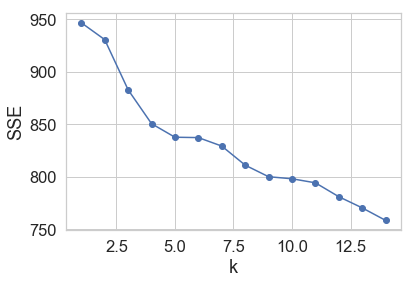

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
df_features = filtered_data
SSE = []  
for k in range(1,15):
    estimator = KMeans(n_clusters=k) 
    estimator.fit(df_features)
    SSE.append(estimator.inertia_)
X = range(1,15)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

#kmeans_model = KMeans(n_clusters=5).fit(X)
#for i, l in enumerate(kmeans_model.labels_):
#    print (i , l)


In [14]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw_nc]


# View bigrams for the first tweet
terms_bigram[0]

[('essence', 'get'),
 ('get', 'cover'),
 ('cover', 'wuzzamsupa'),
 ('wuzzamsupa', 'people'),
 ('people', 'know'),
 ('know', 'real'),
 ('real', 'know'),
 ('know', 'damn'),
 ('damn', 'well')]

In [15]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df



,bigram,count
0,"(good, share)",65
1,"(share, check)",65
2,"(check, items)",65
3,"(items, im)",65
4,"(im, loving)",65
5,"(loving, poshmarkapp)",65
6,"(jobs, ive)",61
7,"(5, jobs)",60
8,"(poshmark, fashion)",59
9,"(fashion, style)",45


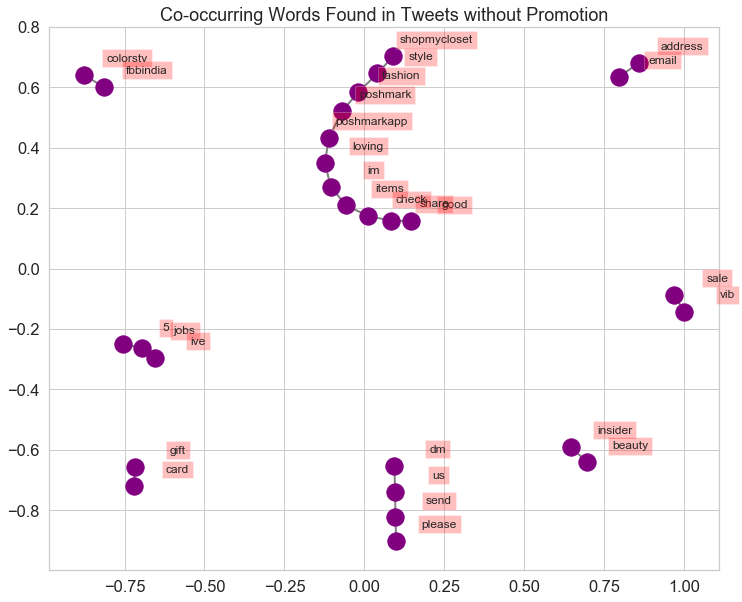

In [20]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

# G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(12, 10))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=2,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=12)
    
ax.set_title("Co-occurring Words Found in Tweets without Promotion")
plt.show()